# Imports

In [12]:
import tkinter as tk
from tkinter import *
from tkinter.ttk import *
from tkinter import ttk
import PIL as pil
from PIL import ImageTk, Image


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


## Import data

In [29]:
data_path = r'Data\train.csv'
temp_data = pd.read_csv(data_path, index_col=['Id'])

train_data = pd.DataFrame(temp_data)

X = train_data.drop(columns=['Pawpularity'])
y = train_data['Pawpularity']
random = 30997
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=random)

# Uge 10 kapitel 7

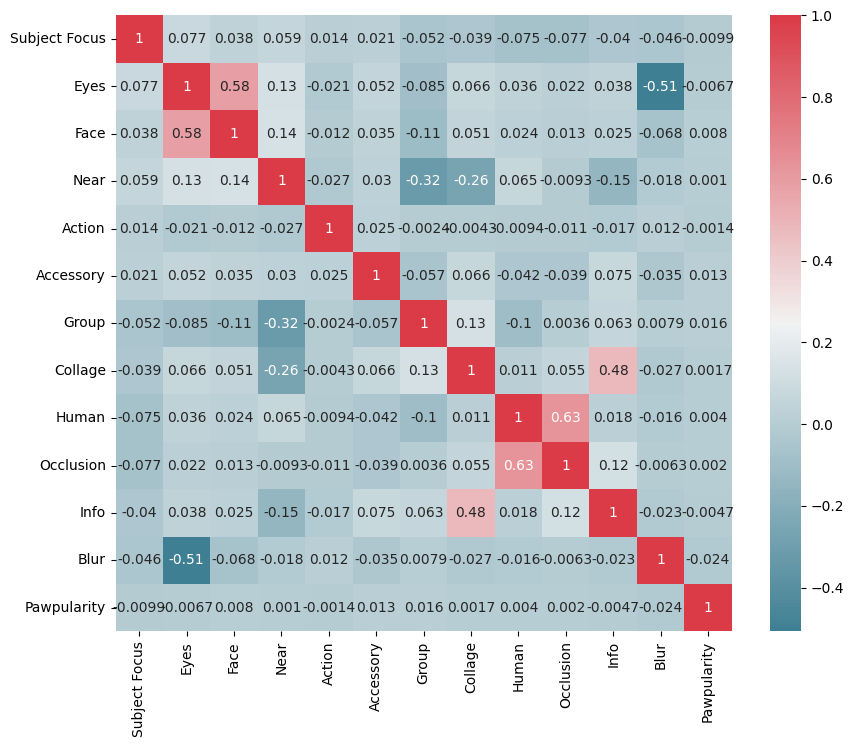

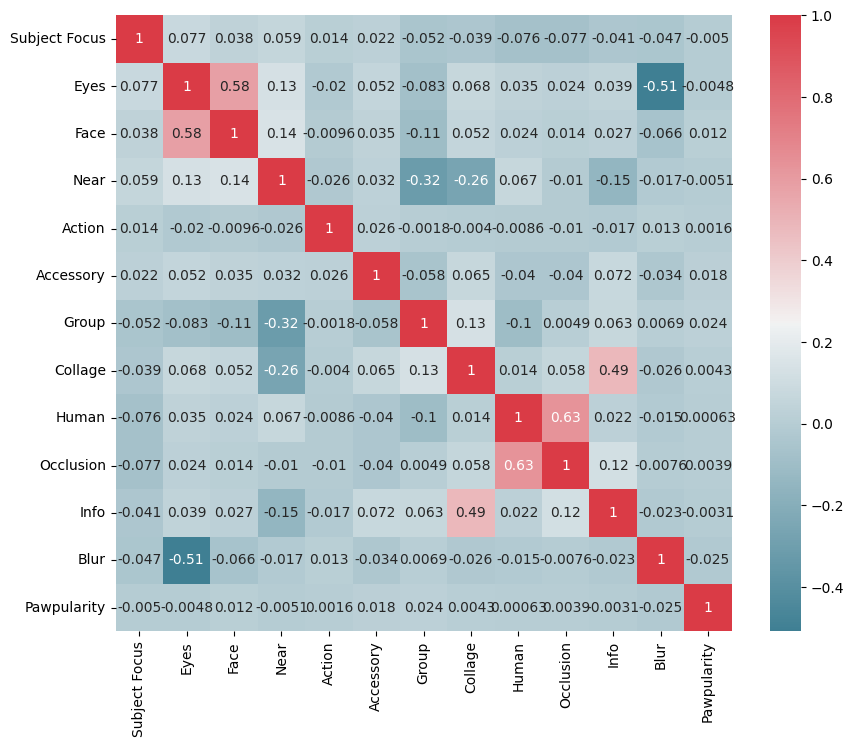

In [3]:
def correlationMatrix(data):
    f, ax = plt.subplots(figsize=(10, 8))
    corr = data.corr()
    sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
    plt.show()
no100data = train_data.drop(train_data[train_data["Pawpularity"]==100].index)
correlationMatrix(train_data)
correlationMatrix(no100data)

In [4]:

def linear_regression( X: pd.DataFrame, y: pd.DataFrame):
    lin_reg = LinearRegression()
    lin_reg.fit(X,y)
    return lin_reg

lin_reg = linear_regression(X_train,y_train)


In [5]:
columns =   ["Occlusion", "Near", "Subject Focus", "Group"]
logiX = train_data[columns]
logiy = train_data['Human'].values
logiX_train, logiX_test,logiy_train,logiy_test = train_test_split(logiX,logiy,test_size=0.2,random_state=random)

def logistic_regression_contains_human(X: pd.DataFrame, y:pd.DataFrame):
    log_reg = LogisticRegression()
    log_reg.fit(X,y)
    return log_reg


logi_reg = logistic_regression_contains_human(logiX_train,logiy_train)


In [10]:
logiregpaw = logistic_regression_contains_human(X_train, y_train)

paw_pred = logiregpaw.predict(X_test)
conf_matrix = sklearn.metrics.confusion_matrix(y_test, paw_pred)
conf_matrix.diagonal()


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  6,  4,  1,  8, 27,  7,  0,  1,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

# Uge 10 kapitel 8

## ROC Curve

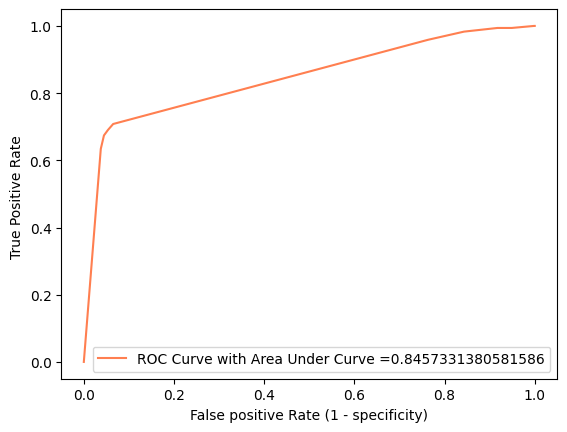

In [56]:
y_pred_proba = logi_reg.predict_proba(X=logiX)[:,1]
[fpr, tpr, thr] = roc_curve(logiy, y_pred_proba)
auc (fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='coral', label = 'ROC Curve with Area Under Curve ='+str(auc (fpr, tpr)))
plt.xlabel('False positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate ')
plt.legend(loc='lower right')
plt.savefig("./static/roccurve.jpg")

## Confusion matrix

In [33]:
logiy_pred = logi_reg.predict(logiX_test)
conf_matrix = sklearn.metrics.confusion_matrix(logiy_test, logiy_pred)
conf_matrix

array([[1579,   70],
       [ 120,  214]], dtype=int64)

## Performance metrics

In [35]:
p = sklearn.metrics.precision_score(logiy_test, logiy_pred, average='micro')
r = sklearn.metrics.recall_score(logiy_test, logiy_pred, average='micro')
f = sklearn.metrics.f1_score(logiy_test, logiy_pred, average='micro')
a = sklearn.metrics.accuracy_score(logiy_test,logiy_pred)
print ("Here're the metrics for the trained model:")
print ("Precision:\t{}\nRecall:\t\t{}\nF-Score:\t{}\nAccuracy:\t{}".format(p,r,f,a))

Here're the metrics for the trained model:
Precision:	0.9041855774079677
Recall:		0.9041855774079677
F-Score:	0.9041855774079677
Accuracy:	0.9041855774079677


## Cross validation for linear regression

In [64]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

# for i, (train_index, test_index) in enumerate(kf.split(X)):
#     print ("Iteration "+str(i+1))
#     print ("Train Indices:", train_index, "\nTest Indices:", test_index,"\n")

score_history = []
for train, test in kf.split(X.to_numpy(), y):
    reg = LinearRegression()
    reg.fit(X.values[train,:], y[train])
    y_pred = reg.predict(X.values[test,:])
    score_history.append(reg.score(X.values[test,:], y[test]))
score_history

C:\Users\chris\AppData\Local\Temp\ipykernel_20996\3422758123.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  reg.fit(X.values[train,:], y[train])
C:\Users\chris\AppData\Local\Temp\ipykernel_20996\3422758123.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score_history.append(reg.score(X.values[test,:], y[test]))
C:\Users\chris\AppData\Local\Temp\ipykernel_20996\3422758123.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


[-0.0011381531784111498,
 -0.0032655098200438104,
 0.0031372020899773645,
 -0.0007086870944514878,
 -0.0024666721129855684]

## TTK

In [13]:
window = tk.Tk()
window.title("Image application")
window.geometry("600x400")

frame  = ttk.Frame(window)
frame.pack()

sub_value = IntVar()
subcheck = tk.Checkbutton(frame, text="Sub", variable=sub_value)
subcheck.pack()

eye_value = IntVar()
eyecheck = tk.Checkbutton(frame, text="eye", onvalue=1 , offvalue=0, variable=eye_value)
eyecheck.pack()

face_value = IntVar()
facecheck = tk.Checkbutton(frame, text="face", onvalue=1 , offvalue=0, variable=face_value)
facecheck.pack()

near_value = IntVar()
nearcheck = tk.Checkbutton(frame, text="near", onvalue=1 , offvalue=0, variable=near_value)
nearcheck.pack()

act_value = IntVar()
actcheck = tk.Checkbutton(frame, text="act", onvalue=1 , offvalue=0, variable=act_value)
actcheck.pack()

acc_value = IntVar()
acccheck = tk.Checkbutton(frame, text="acc", onvalue=1 , offvalue=0, variable=acc_value)
acccheck.pack()

gru_value = IntVar()
grucheck = tk.Checkbutton(frame, text="gru", onvalue=1 , offvalue=0, variable=gru_value)
grucheck.pack()

col_value = IntVar()
colcheck = tk.Checkbutton(frame, text="col", onvalue=1 , offvalue=0, variable=col_value)
colcheck.pack()

hum_value = IntVar()
humcheck = tk.Checkbutton(frame, text="hum", onvalue=1 , offvalue=0, variable=hum_value)
humcheck.pack()

occ_value = IntVar()
occcheck = tk.Checkbutton(frame, text="occ", onvalue=1 , offvalue=0, variable=occ_value)
occcheck.pack()

inf_value = IntVar()
infcheck = tk.Checkbutton(frame, text="inf", onvalue=1 , offvalue=0, variable=inf_value)
infcheck.pack()

blu_value = IntVar()
blucheck = tk.Checkbutton(frame, text="blu", onvalue=1 , offvalue=0, variable=blu_value)
blucheck.pack()

image_label = Label()
score_Text = Label()

def searchImage():
    getvalue = train_data.loc[(train_data["Subject Focus"] == sub_value.get()) & (train_data["Eyes"] == eye_value.get()) & (train_data["Face"] == face_value.get()) & (train_data["Near"] == near_value.get()) & (train_data["Action"] == act_value.get()) & (train_data["Accessory"] == acc_value.get()) & (train_data["Group"] == gru_value.get()) & (train_data["Collage"] == col_value.get()) & (train_data["Human"] == hum_value.get()) & (train_data["Occlusion"] == occ_value.get()) & (train_data["Info"] == inf_value.get()) & (train_data["Blur"] == blu_value.get())]
    if len(getvalue) > 0:
        if logi_reg.predict(getvalue[columns])[0] == 0:
            score_Text.config(text="predicted score = " + str(lin_reg.predict(getvalue.drop(columns=["Pawpularity"]))[0]) + ". Actual score = "+ str(getvalue["Pawpularity"][0]))
            link = f"Data\\train\\{str(getvalue.index[0])}.jpg"
            my_img = ImageTk.PhotoImage(Image.open(link))
            image_label.configure(image=my_img)
            image_label.image = my_img


myButton = Button(frame, text='Åben billede', command=searchImage)

myButton.pack()
score_Text.pack()
image_label.pack()

window.mainloop()

C:\Users\chris\AppData\Local\Temp\ipykernel_20996\1870275751.py:63: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  score_Text.config(text="predicted score = " + str(lin_reg.predict(getvalue.drop(columns=["Pawpularity"]))[0]) + ". Actual score = "+ str(getvalue["Pawpularity"][0]))


## Uge 11 kapitel 9

## Uge 12 kapitel 10

## Uge 15 kapitel 11

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import matplotlib.pyplot as plt

In [51]:
kmean_columns = ['Pawpularity']
kmean_data = train_data.drop(columns=kmean_columns)
# kmean_train, kmean_test = train_test_split(train_data, test_size=0.75, random_state=random)
scaler = MinMaxScaler()
kmean_data_scaled = pd.DataFrame(scaler.fit_transform(kmean_data))
# kmean_test_scaled = pd.DataFrame(scaler.fit_transform(kmean_test))

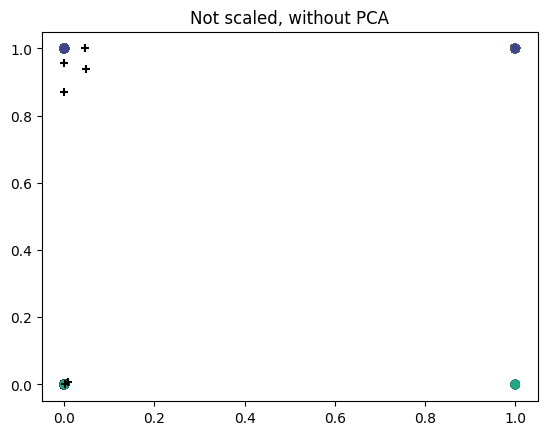

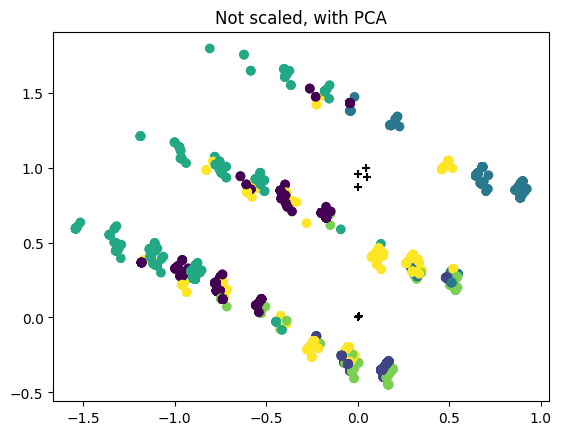

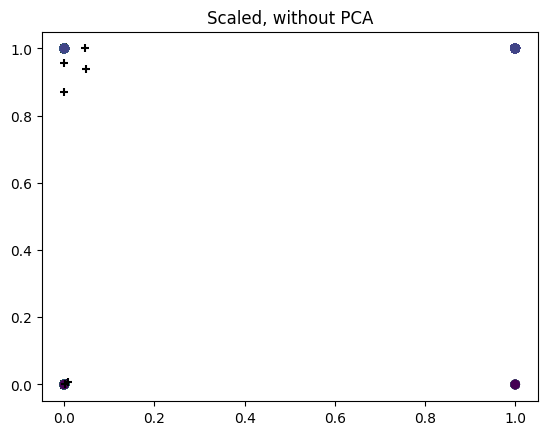

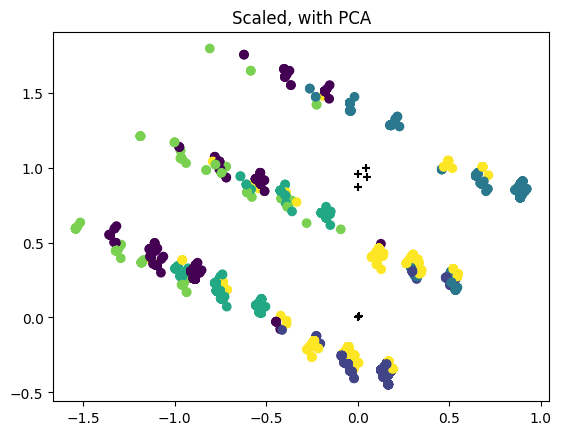

In [85]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(kmean_data)
kmean_pred = kmeans.predict(kmean_data)

kmeans_with_scaled = KMeans(n_clusters=6)
kmeans_with_scaled.fit(kmean_data_scaled)
kmean_pred_from_scaled = kmeans_with_scaled.predict(kmean_data_scaled)

pca = PCA(n_components=2)

fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
fig3, ax3 = plt.subplots()
fig4, ax4 = plt.subplots()

ax1.scatter(kmean_data.to_numpy()[:,0], kmean_data.to_numpy()[:,1], c=kmean_pred)
ax1.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')
ax1.set_title("Not scaled, without PCA")
fig1.savefig("./static/kmeansplot_noscale_nopca.png")

X_pca = pca.fit_transform(kmean_data)
ax2.scatter(X_pca[:,0], X_pca[:,1], c=kmean_pred)
ax2.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')
ax2.set_title("Not scaled, with PCA")
fig2.savefig("./static/kmeansplot2_noscale_pca.png")

ax3.scatter(kmean_data_scaled.to_numpy()[:,0], kmean_data_scaled.to_numpy()[:,1], c=kmean_pred_from_scaled)
ax3.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')
ax3.set_title("Scaled, without PCA")
fig3.savefig("./static/kmeansplot3_scale_nopca.png")

X_pca = pca.fit_transform(kmean_data_scaled)
ax4.scatter(X_pca[:,0], X_pca[:,1], c=kmean_pred_from_scaled)
ax4.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')
ax4.set_title("Scaled, with PCA")
fig4.savefig("./static/kmeansplot4_scale_pca.png")



In [26]:
# data_path = r'Data\train.csv'
# temp_data = pd.read_csv(data_path, index_col=False)

# train_data = pd.DataFrame(temp_data)

X = temp_data.drop(columns=['Id', 'Pawpularity'])

print(X)

      Subject Focus  Eyes  Face  Near  Action  Accessory  Group  Collage  \
0                 0     1     1     1       0          0      1        0   
1                 0     1     1     0       0          0      0        0   
2                 0     1     1     1       0          0      0        0   
3                 0     1     1     1       0          0      0        0   
4                 0     0     0     1       0          0      1        0   
...             ...   ...   ...   ...     ...        ...    ...      ...   
9907              0     0     0     1       0          0      0        0   
9908              0     1     1     1       0          0      0        0   
9909              0     1     1     1       0          0      0        0   
9910              0     1     1     1       0          0      0        0   
9911              0     1     1     1       0          0      0        0   

      Human  Occlusion  Info  Blur  
0         0          0     0     0  
1         0  

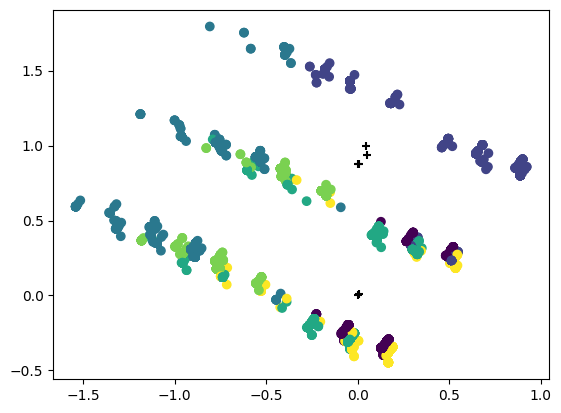

In [27]:
kmeans = KMeans(n_clusters=6)

kmeans.fit(X)

y = kmeans.predict(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='+')

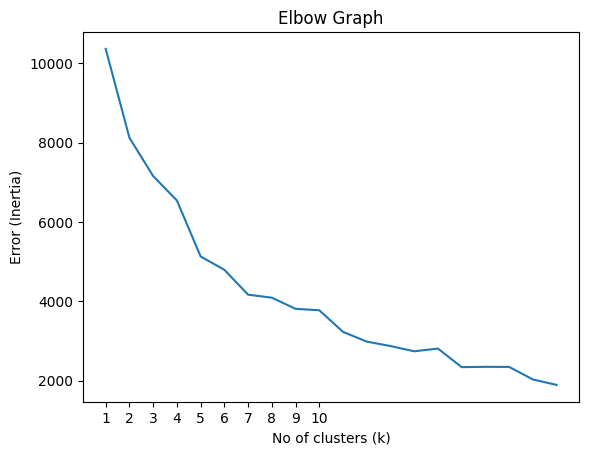

In [ ]:
error = []
for i in range(1,21):
 kmeans = KMeans(n_clusters=i).fit(X)
 error.append(kmeans.inertia_)
import matplotlib.pyplot as plt

plt.plot(range(1,21), error)
plt.title("Elbow Graph")
plt.xlabel("No of clusters (k)")
plt.ylabel("Error (Inertia)")
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

## Uge 16+17 kapitel 12+13

## Uge 18 kapitel 14